In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import math
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Education/BAU Big Data Analytics and Management/BAU BDA Datasets/Mall_Customers.csv")

In [ ]:
print(df.info())
print(df.isnull().sum()*100/df.shape[0])
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


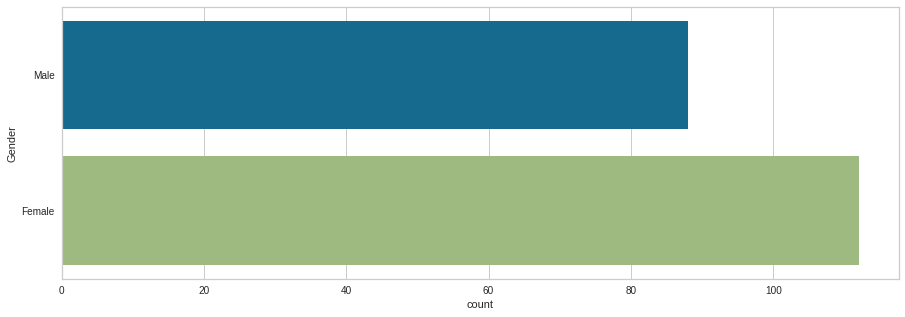

In [ ]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

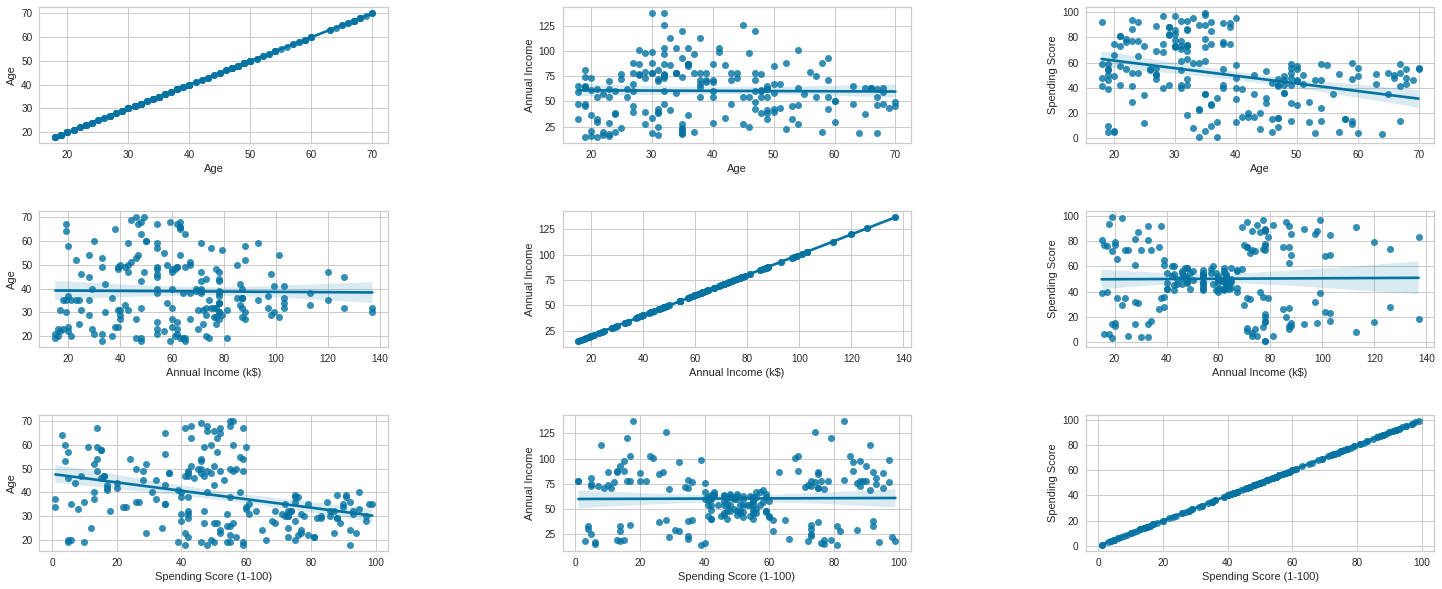

In [ ]:
plt.figure(1 , figsize = (25 , 10))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

<Figure size 3600x1440 with 0 Axes>

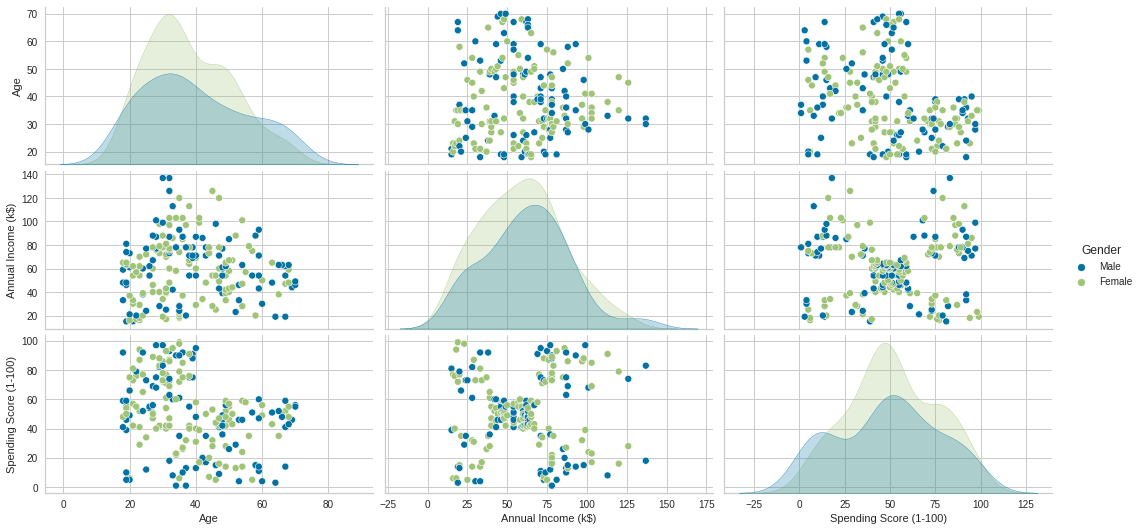

In [ ]:
plt.figure(figsize=(50 , 20))
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=2)
plt.show()

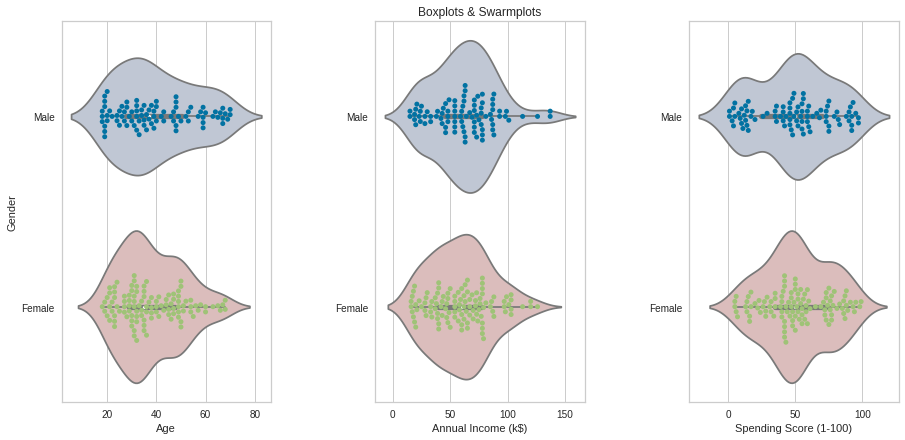

In [ ]:
plt.figure(1 , figsize = (15 , 7))
n = 0 

for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

In [ ]:
X = df.drop(['CustomerID', 'Gender'], axis=1)

In [ ]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'Inertia')

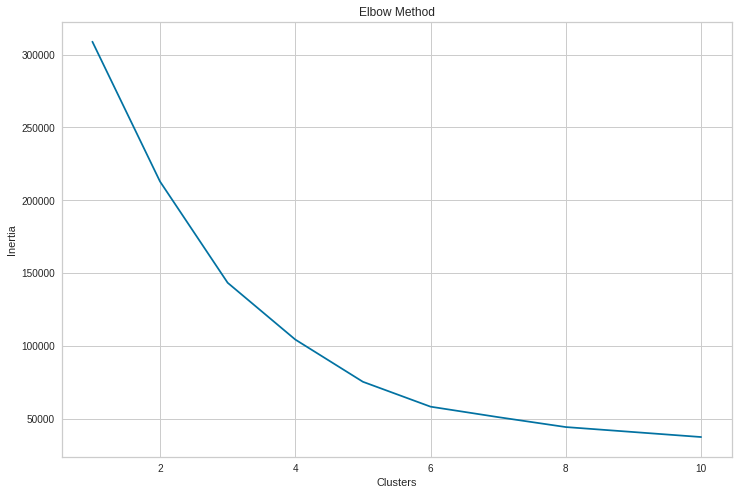

In [ ]:
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, n_init=10, max_iter=100, random_state=42).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Elbow Method')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


In [ ]:
from sklearn.metrics import silhouette_score


Silhoutte Score of 2 clusters is 0.293166070535953
Silhoutte Score of 3 clusters is 0.3839349967742105
Silhoutte Score of 4 clusters is 0.40546302077733304
Silhoutte Score of 5 clusters is 0.44446409171786105
Silhoutte Score of 6 clusters is 0.4523566166018854
Silhoutte Score of 7 clusters is 0.4398198217929885


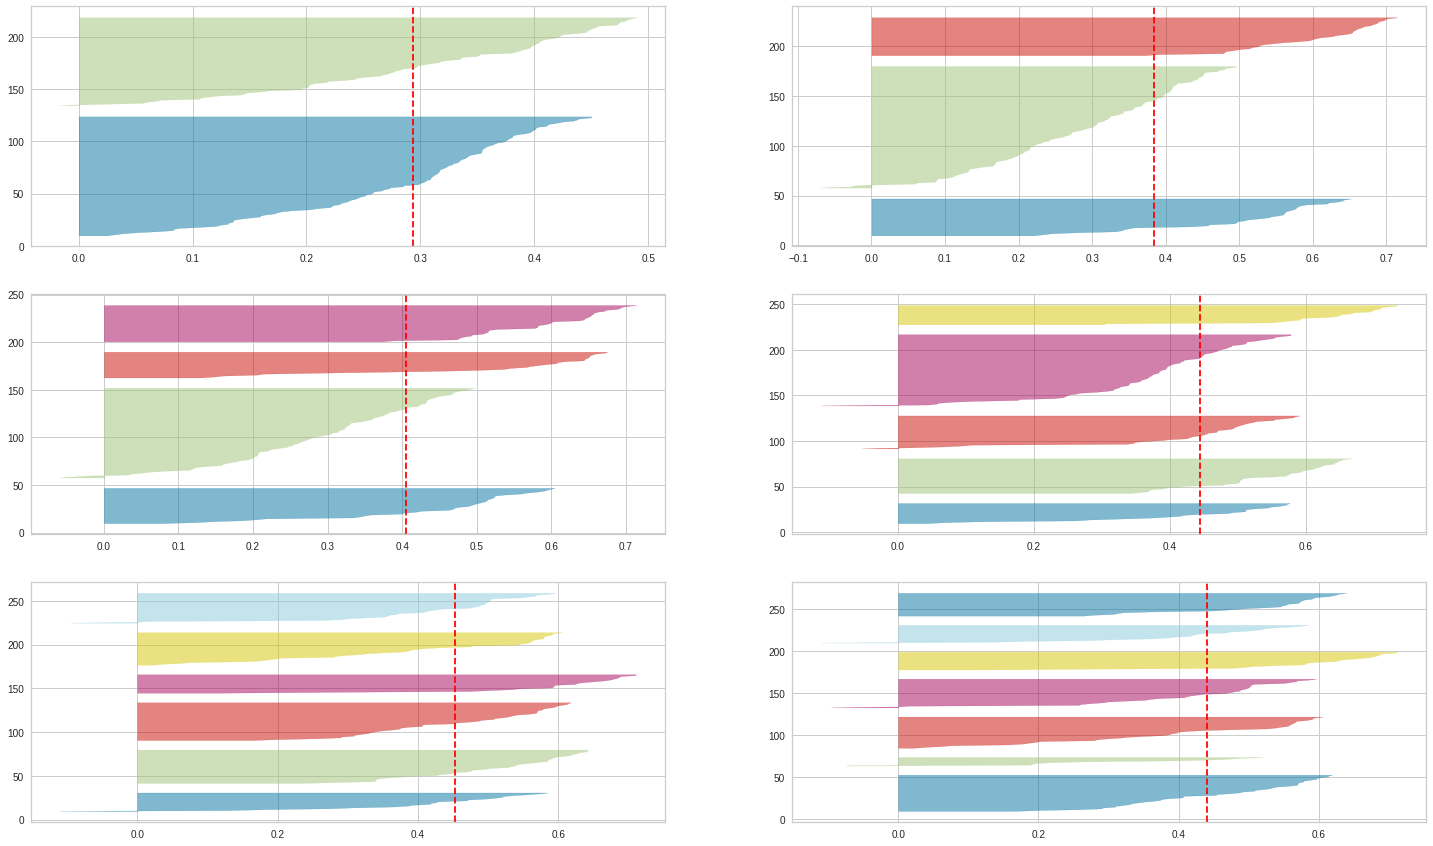

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(3, 2, figsize=(25,15))
for i in [2, 3, 4, 5 ,6,7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 

    print("Silhoutte Score of {} clusters is {}".format(i,silhouette_score(X, km.labels_, metric='euclidean')))

In [ ]:
km = KMeans(n_clusters=5,n_init=10, max_iter=100, random_state=42).fit(X)

In [ ]:
X['Labels'] = km.labels_

In [ ]:
X

,Age,Annual Income (k$),Spending Score (1-100),Labels
0,19,15,39,0
1,21,15,81,4
2,20,16,6,0
3,23,16,77,4
4,31,17,40,0
...,...,...,...,...
195,35,120,79,1
196,45,126,28,2
197,32,126,74,1
198,32,137,18,2


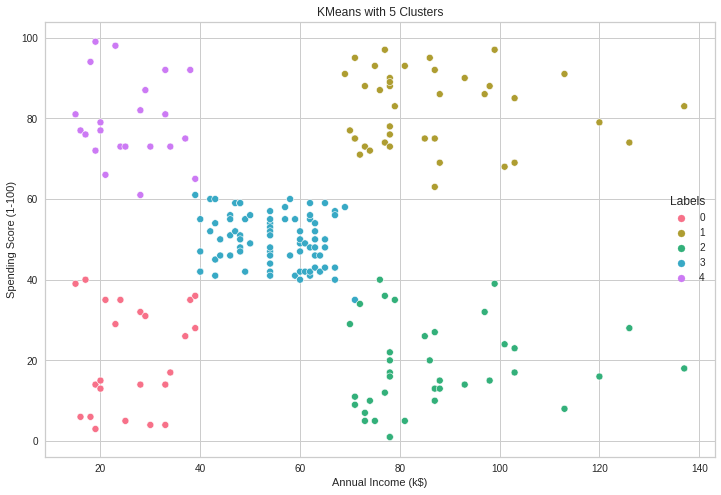

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'],palette=sns.color_palette('husl', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

In [ ]:
labels = km.labels_
centroids = km.cluster_centers_

In [ ]:
df['labels'] =  labels
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['labels'], 
        size= 20,
        line=dict(
            color= df['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
X.groupby("Labels").size().to_frame()

,0
Labels,
0,23
1,39
2,37
3,79
4,22


In [ ]:
print(silhouette_score(X, km.labels_, metric='euclidean'))

0.4451590335884062


In [ ]:
km = KMeans(n_clusters=6,n_init=10, max_iter=100, random_state=42).fit(X)

In [ ]:
X['Labels'] = km.labels_

In [ ]:
labels = km.labels_
centroids = km.cluster_centers_

In [ ]:
df['labels'] =  labels
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['labels'], 
        size= 20,
        line=dict(
            color= df['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
X.groupby("Labels").size().to_frame()

,0
Labels,
0,22
1,39
2,44
3,35
4,38
5,22


In [ ]:
print(silhouette_score(X, km.labels_, metric='euclidean'))

0.45337793525593234
